<a href="https://colab.research.google.com/github/wcj365/pandas-grouping/blob/master/energy_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas Group By

Acquire power data (source) for at least 10 days and not more than 40 days. 

https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic

- Load the data into a Jupyter Notebook. 
- Create two bar graphs of the power consumption per hour. 
- One bar graph has 24 bars (average of power consumption per hour for the chosen days); 
- one bar graph has 24*(number of days) bars (power consumption for every hour in all the days). 



In [0]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## Step 1 - Load the first 6 days of Jan 2020.
The site limits number of records to be downloaed to 2000. So we have two files.

In [71]:
demand01 = pd.read_csv('RollingSystemDemand01.csv')
demand01.sample(5)

,HDR,ROLLING SYSTEM DEMAND
VD,20200106122500,36895.0
VD,20200106140000,38637.0
VD,20200106162000,41243.0
VD,20200102143500,37062.0
VD,20200105104500,32147.0


In [72]:
demand01.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20200106234000,26540.0
VD,20200106234500,26474.0
VD,20200106235000,26235.0
VD,20200106235500,25988.0
FTR,1728,NaN


In [73]:
demand01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1729 entries, VD to FTR
Data columns (total 2 columns):
HDR                      1729 non-null int64
ROLLING SYSTEM DEMAND    1728 non-null float64
dtypes: float64(1), int64(1)
memory usage: 40.5+ KB


## Step 2 - Load the next 6 days of Jan 2020.

In [74]:
demand02 = pd.read_csv('RollingSystemDemand02.csv')
demand02.sample(5)

,HDR,ROLLING SYSTEM DEMAND
VD,20200107215500,30507.0
VD,20200112083500,28119.0
VD,20200110001500,26999.0
VD,20200107063000,30291.0
VD,20200107230500,26591.0


In [75]:
demand02.shape

(1729, 2)

## Step 3 - Concatenate two dataframes into one.

In [76]:
demand = pd.concat([demand01,demand02])
demand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3458 entries, VD to FTR
Data columns (total 2 columns):
HDR                      3458 non-null int64
ROLLING SYSTEM DEMAND    3456 non-null float64
dtypes: float64(1), int64(1)
memory usage: 81.0+ KB


## Step 4 - Data Cleasning

In [77]:
demand.dropna(inplace=True)
demand.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20200112233500,25540.0
VD,20200112234000,25284.0
VD,20200112234500,25141.0
VD,20200112235000,25005.0
VD,20200112235500,24909.0


In [78]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, VD to VD
Data columns (total 2 columns):
HDR                      3456 non-null int64
ROLLING SYSTEM DEMAND    3456 non-null float64
dtypes: float64(1), int64(1)
memory usage: 81.0+ KB


In [79]:
demand["HDR"] = demand["HDR"].astype(str)
demand.dtypes

HDR                       object
ROLLING SYSTEM DEMAND    float64
dtype: object

## Step 5 - Data Transformation

In [80]:
x = "20200102043000"
#    01234567890123
x[8:10]

'04'

In [81]:
demand['HOUR'] = demand['HDR'].str[8:10]
demand.sample(10)

,HDR,ROLLING SYSTEM DEMAND,HOUR
VD,20200104153500,34596.0,15
VD,20200110054500,27651.0,05
VD,20200107161000,40167.0,16
VD,20200111061000,25173.0,06
VD,20200112055000,23664.0,05
VD,20200108172000,45076.0,17
VD,20200108070500,34578.0,07
VD,20200109052500,26157.0,05
VD,20200108191500,43428.0,19
VD,20200106211500,35609.0,21


In [82]:
demand["HOUR"].unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

## Step 6 - Data Aggregation 

In [83]:
grouped = demand.groupby("HOUR").mean().reset_index()
grouped

,HOUR,ROLLING SYSTEM DEMAND
0,00,25990.881944
1,01,25875.604167
2,02,25455.326389
3,03,25095.881944
4,04,24881.472222
5,05,25097.138889
6,06,27743.736111
7,07,31398.034722
8,08,33525.527778
9,09,34913.381944


## Step 7 - Data Visualization

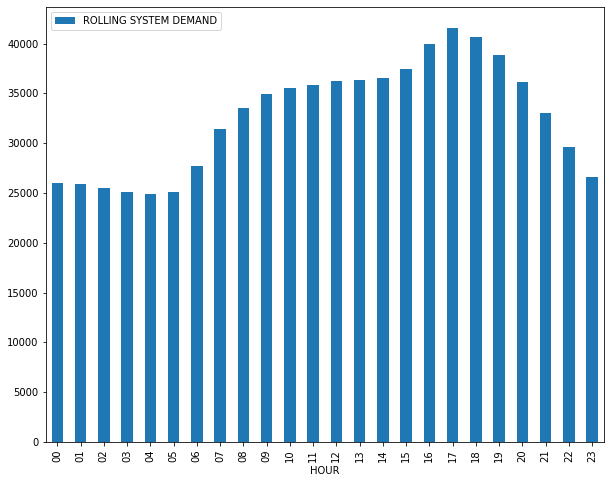

In [84]:
grouped.plot.bar(x="HOUR",y="ROLLING SYSTEM DEMAND", figsize=(10,8))

## Repeat Step 5 to 7 for "Day"

In [85]:
demand['DAY'] = demand['HDR'].str[6:8]
demand.sample(10)

,HDR,ROLLING SYSTEM DEMAND,HOUR,DAY
VD,20200107115500,37821.0,11,07
VD,20200106024500,25939.0,02,06
VD,20200103184500,41401.0,18,03
VD,20200112050000,23910.0,05,12
VD,20200103101000,37627.0,10,03
VD,20200101204000,32343.0,20,01
VD,20200107190500,39603.0,19,07
VD,20200104171500,39161.0,17,04
VD,20200106105000,38258.0,10,06
VD,20200111213000,31148.0,21,11


In [86]:
demand["DAY"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [87]:
grouped_day = demand.groupby("DAY").sum().reset_index()
grouped_day

,DAY,ROLLING SYSTEM DEMAND
0,01,8569317.0
1,02,9307979.0
2,03,9558818.0
3,04,8979903.0
4,05,8778245.0
5,06,9913320.0
6,07,9727564.0
7,08,10286331.0
8,09,10270638.0
9,10,10000573.0


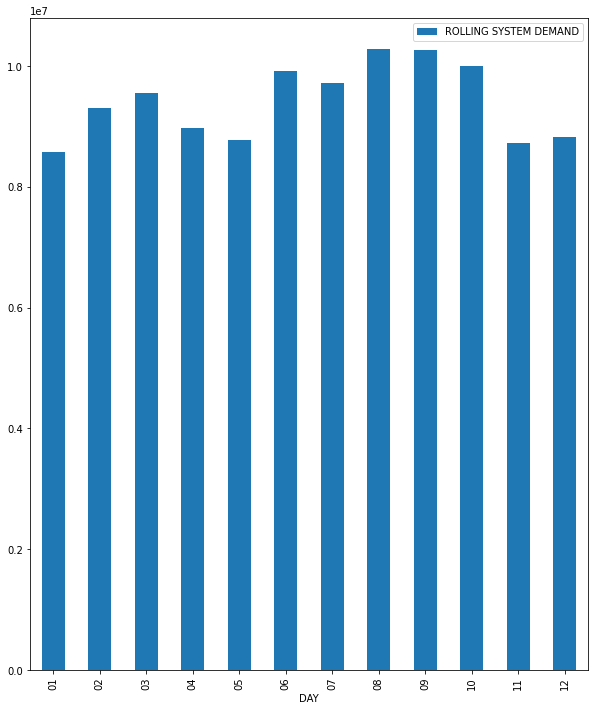

In [88]:
grouped_day.plot.bar(x="DAY",y="ROLLING SYSTEM DEMAND", figsize=(10,12),)